<a href="https://colab.research.google.com/github/fadhillahrojabhy201/Fadhillah-Rojabhy_Project1/blob/main/FadhillahRojabhy_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Phyton Libraries**

In [ ]:
!pip install sastrawi
!pip install Emoji
!pip install lazypredict
!pip install nlpaug
!pip install transformers
!pip install pyspellchecker
!pip install nltk
!pip install --upgrade tensorflow
!pip install keras
!pip install -q -U keras-tuner
!pip install wordcloud
!pip install imbalanced-learn
!pip install scikit-learn
!pip install textaugment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.2/553.2 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.0 MB/s eta 0:00:00
  Created whe

# Import Libraries and Download Source

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk
import seaborn as sns
import os
import matplotlib.pyplot as plt
import json
import re
import emoji
import numpy as np

# Import Sastrawi for stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Upload Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tweet.csv to tweet.csv


In [ ]:
# Check the current working directory to see uploaded files
import os
print(os.listdir())  # This will list all files in the current directory

# Load the CSV file you just uploaded
df = pd.read_csv('tweet.csv', encoding='UTF-8')

# Check the first few rows of the dataset to verify it's loaded correctly
df.head()

['.config', 'dictionary', 'tweet.csv', 'dataset', 'combined_slang_words.json', 'sample_data']


,Unnamed: 0,sentimen,tweet
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...


# Define Project Paths and Load Dataset

Remove the 'Unnamed: 0' column (if needed)

In [ ]:
# Define project paths
project_path = os.getcwd()  # Current working directory
dataset_path = "dataset"
dictionary_path = "dictionary"
dataset_name = "tweet.csv"

# Create directories if they don't exist
os.makedirs(os.path.join(project_path, dataset_path), exist_ok=True)
os.makedirs(os.path.join(project_path, dictionary_path), exist_ok=True)

# Drop the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis=1, inplace=True)

# Verify that the column is dropped
df.head()

,sentimen,tweet
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,negatif,Negara kita ngutang buat bngun infrastruktur y...


Proceed with Preprocessing Steps

In [ ]:
# Convert tweets to lowercase
df['tweet_lower'] = df['tweet'].str.lower()

# Remove mentions (@user) and hashtags (#hashtag)
df['tweet_clean'] = df['tweet_lower'].str.replace(r'@\w+|#\w+', '', regex=True)

# Check the cleaned tweets
df[['tweet', 'tweet_clean']].head()

,tweet,tweet_clean
0,Kata @prabowo Indonesia tidak dihargai bangsa ...,kata indonesia tidak dihargai bangsa asing! ...
1,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...","batuan langka, tasbih jokowi hadiah dari habib..."
2,"Di era Jokowi, ekonomi Indonesia semakin baik....","di era jokowi, ekonomi indonesia semakin baik...."
3,"Bagi Sumatera Selatan, Asian Games berdampak p...","bagi sumatera selatan, asian games berdampak p..."
4,Negara kita ngutang buat bngun infrastruktur y...,negara kita ngutang buat bngun infrastruktur y...


# Check for Missing Values and Duplicates


In [ ]:
# Check for missing values
print("Missing Values:\n", df.isna().sum() / len(df))

# Remove duplicates
df = df.drop_duplicates()
print(f'Jumlah Data setelah menghapus duplikat: {len(df)}')

# Check for missing values again
print("Missing Values:\n", df.isna().sum() / len(df))

Missing Values:
 sentimen       0.0
tweet          0.0
tweet_lower    0.0
tweet_clean    0.0
dtype: float64
Jumlah Data setelah menghapus duplikat: 1815
Missing Values:
 sentimen       0.0
tweet          0.0
tweet_lower    0.0
tweet_clean    0.0
dtype: float64


Data Distribution Visualization

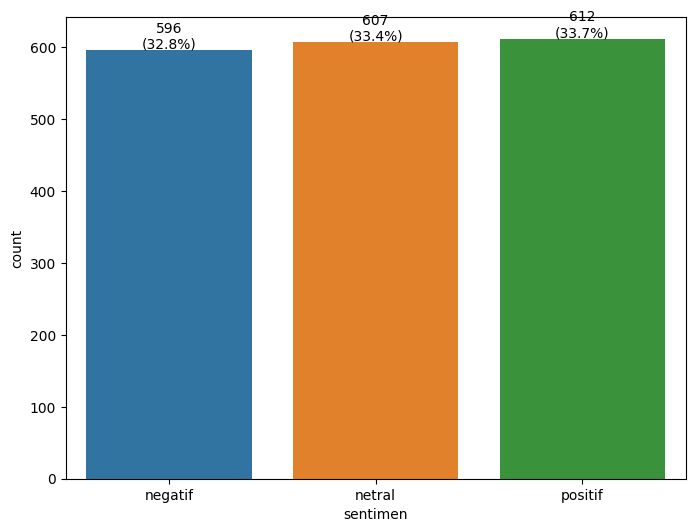

In [ ]:
# Visualize data distribution for each sentiment label
plt.figure(figsize=(8, 6), dpi=100)
ax = sns.countplot(data=df, x='sentimen', hue='sentimen')
total = float(len(df))

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}\n({height/total:.1%})',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')

plt.show()

# Preprocessing Tweets

Convert Tweets to Lowercase

In [ ]:
# Convert tweets to lowercase
df['tweet_lower'] = df['tweet'].str.lower()

*Emoji* Handling

In [ ]:
# Convert emoji to meaningful text using the emoji library
def convert_emoji_to_text(tweet):
    return emoji.demojize(tweet, delimiters=(" ", " "))

df['tweet_with_emoji'] = df['tweet_lower'].apply(convert_emoji_to_text)

Remove Hashtags, Mentions, and URLs

In [ ]:
# Remove mentions, hashtags, and URLs
df['tweet_clean'] = df['tweet_with_emoji'].str.replace(r'@\w+|#\w+', '', regex=True)  # Remove mentions and hashtags
df['tweet_clean'] = df['tweet_clean'].str.replace(r'http\S+|www\S+|https\S+', '', regex=True)  # Remove URLs
df['tweet_clean'] = df['tweet_clean'].str.replace(r'pic\.twitter\.com/\S+', '', regex=True)  # Remove image URLs
df['tweet_clean'] = df['tweet_clean'].str.replace(r'[^\w\s]', ' ', regex=True)  # Remove special characters

Remove Stopwords

In [ ]:
# Define stopwords for Indonesian
stop_words = set(stopwords.words('indonesian'))

# Define exceptions for stopwords
exc_stopwords = ['tidak', 'belum', 'bukan', 'tanpa', 'jarang', 'kurang', 'baik', 'bisa', 'mungkin', 'boleh', 'masalah']
stop_words = stop_words - set(exc_stopwords)

# Remove stopwords
df['tweet_no_sw'] = df['tweet_clean'].apply(lambda tweet: ' '.join([word for word in word_tokenize(tweet) if word not in stop_words]))

Remove Extra Spaces

In [ ]:
# Remove extra spaces
df['tweet_no_extra_space'] = df['tweet_no_sw'].str.strip().str.replace(r'\s+', ' ', regex=True)

Handle Slang Words

In [ ]:
# Load slang word dictionary
# Make sure the path to 'combined_slang_words.json' is correct
with open('combined_slang_words.json', 'r') as json_file:
    slang_words_dict = json.load(json_file)

# Function to replace slang words using the dictionary
def process_slang(text, dictionary=slang_words_dict):
    slang_words = re.compile(r'\b(?:' + '|'.join(re.escape(word) for word in dictionary.keys()) + r')\b')
    return slang_words.sub(lambda x: dictionary[x.group()], text)

# Apply the slang word processing to the 'tweet_no_extra_space' column
df['tweet_no_slang'] = df['tweet_no_extra_space'].apply(process_slang)

# View the processed data
df[['tweet', 'tweet_no_slang']].head()

,tweet,tweet_no_slang
0,Kata @prabowo Indonesia tidak dihargai bangsa ...,indonesia tidak dihargai bangsa asing berita ð...
1,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",batuan langka tasbih jokowi hadiah habib luthf...
2,"Di era Jokowi, ekonomi Indonesia semakin baik....",era jokowi ekonomi indonesia baik
3,"Bagi Sumatera Selatan, Asian Games berdampak p...",sumatera selatan asian games berdampak pada ek...
4,Negara kita ngutang buat bngun infrastruktur y...,negara ngutang bngun infrastruktur sudah dipak...


Stemming Using Sastrawi

In [ ]:
# Stemming using Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['tweet_stemming'] = df['tweet_no_slang'].apply(lambda tweet: stemmer.stem(tweet))

Tokenization

In [ ]:
# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['tweet_stemming'])
X_lstm = tokenizer.texts_to_sequences(df['tweet_stemming'])
X_lstm = pad_sequences(X_lstm, maxlen=100)

# Convert sentiment labels to one-hot encoding
sentiment_mapping = {'positif': 1, 'negatif': 0, 'netral': 2}
y_lstm = to_categorical(df['sentimen'].map(sentiment_mapping))

# Split the data into training and testing sets
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Now your data is ready for model training.

Display a Random Sample of the Processed Tweets

In [ ]:
# Display a random sample of the data
random_sample = df.sample(n=20, random_state=1)
for index, row in random_sample.iterrows():
    print(f"Index: {index}")
    print(f"Asli: {row['tweet']}")
    print(f"Processed with Emoji: {row['tweet_with_emoji']}")
    print(f"Stemming with Sastrawi: {row['tweet_stemming']}")
    print("-" * 100)  # Separator

Index: 596
Asli: Berita yang menyalahkan SBY sebagai salah satu pembuat kesalahan dalam perekonomian Indonesia, Mungkin sebaiknya hal tersebut tidak disebut Prabowo ke muka publik. Suatu kesalahan yang terlihat konyol.  http://cnn.id/386111Â 
Processed with Emoji: berita yang menyalahkan sby sebagai salah satu pembuat kesalahan dalam perekonomian indonesia, mungkin sebaiknya hal tersebut tidak disebut prabowo ke muka publik. suatu kesalahan yang terlihat konyol.  http://cnn.id/386111â 
Stemming with Sastrawi: berita salah sby salah buat salah ekonomi indonesia mungkin tidak prabowo muka publik salah konyol
----------------------------------------------------------------------------------------------------
Index: 972
Asli: Pak @jokowi menwarkan Program Membina Ekonomi Keluarga Sejahtera (Mekaar) binaan Permodalan Nasional Madani (PNM) diluncurkan untuk menaikkan kesejahteraan warga, terutama ibu-ibu rumah tangga ke tingkat yang lebih atas lagi.   https://setkab.go.id/presiden-jokowi-pro

# Vectorization (TF-IDF-Word2Vec)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TF-IDF for vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['tweet_no_slang'])

# Splitting dataset for training and testing pelatihan
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['sentimen'], test_size=0.2, random_state=42)

# Random Forest Experiment

In [ ]:
# Split the data into training, validation, and testing sets (80% train, 10% validation, 10% test)
X_train_lstm, X_temp_lstm, y_train_lstm, y_temp_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)
X_val_lstm, X_test_lstm, y_val_lstm, y_test_lstm = train_test_split(X_temp_lstm, y_temp_lstm, test_size=0.5, random_state=42)

# Now you have:
# X_train_lstm, y_train_lstm for training
# X_val_lstm, y_val_lstm for validation
# X_test_lstm, y_test_lstm for testing

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# --- Training Data Evaluation ---
# Predict on the training data
y_pred_train_rf = rf_model.predict(X_train)

# Evaluate the model on the training data
print("Random Forest Classification Report (Training Data):\n", classification_report(y_train, y_pred_train_rf))
print("Confusion Matrix (Training Data):\n", confusion_matrix(y_train, y_pred_train_rf))

# --- Validation Data Evaluation ---
# Step 1: Ensure both the true labels and predicted labels are in single-class format
# Convert one-hot encoded labels back to single-class labels for validation set
if len(y_val_lstm.shape) > 1:  # Check if y_val_lstm is one-hot encoded
    y_val_lstm_single = np.argmax(y_val_lstm, axis=1)
else:
    y_val_lstm_single = y_val_lstm

# Convert the predicted probabilities or one-hot encodings to single-class labels
y_pred_val_rf_single = np.argmax(y_pred_val_rf, axis=1)

# Step 2: Generate the classification report
print("Random Forest Classification Report (Validation Data):\n")
print(classification_report(y_val_lstm_single, y_pred_val_rf_single))

# Step 3: Create confusion matrix for the validation data
print("Confusion Matrix (Validation Data):\n")
print(confusion_matrix(y_val_lstm_single, y_pred_val_rf_single))

# --- Test Data Evaluation ---
# Predict on the test data
y_pred_test_rf = rf_model.predict(X_test)

# Evaluate the model on the test data
print("Random Forest Classification Report (Test Data):\n", classification_report(y_test, y_pred_test_rf))
print("Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred_test_rf))

Random Forest Classification Report (Training Data):
               precision    recall  f1-score   support

     negatif       1.00      1.00      1.00       481
      netral       1.00      1.00      1.00       489
     positif       1.00      1.00      1.00       482

    accuracy                           1.00      1452
   macro avg       1.00      1.00      1.00      1452
weighted avg       1.00      1.00      1.00      1452

Confusion Matrix (Training Data):
 [[480   0   1]
 [  1 488   0]
 [  0   2 480]]
Random Forest Classification Report (Validation Data):

              precision    recall  f1-score   support

           0       0.42      0.89      0.57        56
           1       0.62      0.23      0.33        66
           2       0.74      0.49      0.59        59

    accuracy                           0.52       181
   macro avg       0.60      0.54      0.50       181
weighted avg       0.60      0.52      0.49       181

Confusion Matrix (Validation Data):

[[50  2  4

# LSTM Experiment

In [ ]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 1: Encode Sentiment Labels into Integers
label_encoder = LabelEncoder()
df['sentimen_encoded'] = label_encoder.fit_transform(df['sentimen'])

# Tokenization and padding for LSTM input
# nitip erwin coba ganti 10000 tokenizer = Tokenizer(num_words=5000)
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['tweet_no_slang'])

X_seq = tokenizer.texts_to_sequences(df['tweet_no_slang'])
X_padded = pad_sequences(X_seq, maxlen=100)

# Step 2: Split dataset into training and test sets
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_padded, df['sentimen_encoded'], test_size=0.2, random_state=42)

# **Ensure y_train_lstm and y_test_lstm are integers**
y_train_lstm = y_train_lstm.astype(int)
y_test_lstm = y_test_lstm.astype(int)

# Step 3: Build the LSTM Model
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=64),  # Removed input_length
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(3, activation='softmax')  # '3' because we have 3 sentiment classes
])

# Step 4: Compile the model
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

# Step 6: Evaluate the model
lstm_loss, lstm_accuracy = model_lstm.evaluate(X_test_lstm, y_test_lstm)
print(f"LSTM Model Accuracy: {lstm_accuracy}")

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.4094 - loss: 1.0732 - val_accuracy: 0.4490 - val_loss: 1.0265
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 12s 268ms/step - accuracy: 0.5420 - loss: 0.9423 - val_accuracy: 0.5482 - val_loss: 0.9883
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 293ms/step - accuracy: 0.7304 - loss: 0.6637 - val_accuracy: 0.5372 - val_loss: 1.0058
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 266ms/step - accuracy: 0.8356 - loss: 0.4326 - val_accuracy: 0.5785 - val_loss: 1.0790
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 272ms/step - accuracy: 0.9376 - loss: 0.1998 - val_accuracy: 0.5923 - val_loss: 1.1691
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 239ms/step - accuracy: 0.9508 - loss: 0.1375 - val_accuracy: 0.5620 - val_loss: 1.4141
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 228ms/step - accuracy: 0.9520 - loss: 0.1220 - val_accuracy: 0.5647 - val_loss: 1.3866
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 253ms/step - accuracy: 0.9663 - loss: 0.0785 - val_accurac

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import joblib

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Use the loky backend to prevent warnings with os.fork() in multithreaded environments
with joblib.parallel_backend('loky'):
    # Initialize GridSearchCV for Random Forest
    grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, n_jobs=-1)

    # Fit the model to the data
    grid_search.fit(X_train, y_train)

    # Print the best parameters found by GridSearchCV
    print("Best Random Forest Params:", grid_search.best_params_)

Best Random Forest Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}


In [ ]:
# Use the best parameters found by GridSearchCV
best_rf_model = RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=200)

# Train the model
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

     negatif       0.61      0.70      0.65       115
      netral       0.61      0.63      0.62       118
     positif       0.64      0.53      0.58       130

    accuracy                           0.62       363
   macro avg       0.62      0.62      0.62       363
weighted avg       0.62      0.62      0.62       363

Confusion Matrix:
 [[81 21 13]
 [18 74 26]
 [34 27 69]]
